14 Data Analysis Examples（数据分析实例）
14.1 USA.gov Data from Bitly（USA.gov数据集）

2011年，短链接服务（URL shortening service）商Bitly和美国政府网站USA.gov合作，提供了一份从用户中收集来的匿名数据，这些用户使用了结尾为.gov或.mil的短链接。在2011年，这些数据的动态信息每小时都会保存一次，并可供下载。不过在2017年，这项服务被停掉了。

数据是每小时更新一次，文件中的每一行都用JOSN（JavaScript Object Notation）格式保存。我们先读取几行看一下数据是什么样的：

In [6]:
path='datasets/bitly_usagov/example.txt'

In [7]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

python有很多内置的模块能把JSON字符串转换成Python字典对象。这里我们用JSON模块：

In [8]:
import json
path = 'datasets/bitly_usagov/example.txt'
records = [json.loads(line) for line in open(path)]

上面这种方法叫做列表推导式, list comprehension, 在一组字符串上执行一条相同操作（比如这里的json.loads）。结果对象records现在是一个由dict组成的list：

In [9]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [10]:
records[0]['tz']

'America/New_York'

1 Counting Time Zones in Pure Python（用纯python代码对时区进行计数）

我们想知道数据集中出现在哪个时区（即tz字段）


In [11]:
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

看来并不是所有的记录都有时区字段。那么只需要在推导式的末尾加一个if 'tz' in rec判断即可

In [12]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [13]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

在这10条时区信息中，可以看到有些是空字符串，现在先留着。

为了对时区进行计数，我们用两种方法：一个用纯python代码，比较麻烦。另一个用pandas，比较简单。 这里我们先介绍使用纯python代码的方法：

遍历时区的过程中将计数值保存在字典中：


In [14]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [15]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # 所有的值均会被初始化为0
    for x in sequence:
        counts[x] += 1
    return counts

译者：下面关于defaultdict的用法是我从Stack Overflow上找到的，英文比较多，简单的说就是通常如果一个字典里不存在一个key，调用的时候会报错，但是如果我们设置了了default，就不会被报错，而是会新建一个key，对应的value就是我们设置的int，这里int代表0）

    defaultdict means that if a key is not found in the dictionary, then instead of a KeyError being thrown, a new entry is created. The type of this new entry is given by the argument of defaultdict.

somedict = {}
print(somedict[3]) # KeyError

someddict = defaultdict(int)
print(someddict[3]) # print int(), thus 0

    Usually, a Python dictionary throws a KeyError if you try to get an item with a key that is not currently in the dictionary. The defaultdict in contrast will simply create any items that you try to access (provided of course they do not exist yet). To create such a "default" item, it calls the function object that you pass in the constructor (more precisely, it's an arbitrary "callable" object, which includes function and type objects). For the first example, default items are created using int(), which will return the integer object 0. For the second example, default items are created using list(), which returns a new empty list object.


In [16]:
someddict=defaultdict(int)

In [17]:
someddict

defaultdict(int, {})

In [18]:
someddict

defaultdict(int, {})

In [19]:
someddict[3]

0

In [20]:
#上面用函数的方式写出来是为了有更高的可用性。要对它进行时区处理，只需要将time_zones传入即可：

In [23]:
counts=get_counts(time_zones)

In [24]:
counts['America/New_York']

1251

In [25]:
len(time_zones)

3440

In [26]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [27]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [28]:
#如果用python标准库里的collections.Counter类，能让这个任务变得更简单

In [29]:
from collections import Counter

In [30]:
counts = Counter(time_zones)

In [31]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

2 Counting Time Zones with pandas（用pandas对时区进行计数）

从一组原始记录中创建DataFrame是很简单的，直接把records传递给pandas.DataFrame即可：


In [32]:
import pandas as pd
import numpy  as  np


In [33]:
frame=pd.DataFrame(records)

In [34]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [35]:
tz_counts=frame['tz'].value_counts()

In [36]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

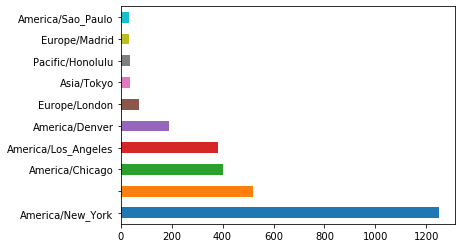

In [37]:
%matplotlib inline
tz_counts[:10].plot(kind='barh',rot=0)

In [38]:
import seaborn as sns

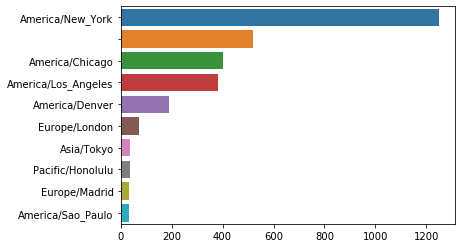

In [40]:
subset=tz_counts[:10]
sns.barplot(y=subset.index,x=subset.values)

In [41]:
results = Series([x.split()[0] for x in frame.a.dropna()])

NameError: name 'Series' is not defined